# MCTS-backed Self-Play of the Trained Neural Network

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf

In [3]:
BOARD_SIZE=15

---

### Setup

In [4]:
from aegomoku.interfaces import PolicyAdvisor
from aegomoku.gomoku_board import GomokuBoard
from aegomoku.gomoku_game import GomokuGame, ConstantBoardInitializer
from aegomoku.mcts import MCTS, MctsParams

cbi = ConstantBoardInitializer(stones='H8G7I7G9')
game = GomokuGame(board_size=BOARD_SIZE, initializer=cbi)
params = MctsParams(cpuct=1.0, num_simulations=100, advice_cutoff=0.01)
model = tf.keras.models.load_model("models/first_model.model")
adviser = PolicyAdvisor(model, advice_cut_off=0.01)
mcts = MCTS(game, adviser, params)
board = GomokuBoard(BOARD_SIZE, cbi.initial_stones())

2022-08-21 13:02:53.375844: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 13:02:53.376554: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 13:02:53.382104: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 13:02:53.382745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 13:02:53.383621: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

### Play

In [5]:
import numpy as np
from tqdm import tqdm

done = game.get_game_ended(board)

for episode_step in tqdm(range(50)):
    t = 1.0
    pi = mcts.get_action_prob(board, temperature=t)
    action = np.random.choice(len(pi), p=pi)

    board.act(action)
    done = game.get_game_ended(board)
    if done is not None:
        print("We have a winner!")
        break

/home/wgiersche/.local/share/virtualenvs/DeepGomoku-yQC4gx5q/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
2022-08-21 13:02:56.885494: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-08-21 13:02:57.072218: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
 46%|████▌     | 23/50 [01:39<01:57,  4.34s/it]

We have a winner!


In [6]:
board.plot()

                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  X  .  .  .  .  .  .  .  .    
12    .  .  .  .  X  .  .  .  .  X  .  .  .  .  .    
11    .  .  .  .  .  .  O  X  O  .  .  .  .  .  .    
10    .  .  .  X  O  X  O  O  O  O  X  .  .  .  .    
 9    .  .  .  .  X [O] O  O  O  O  X  .  .  .  .    
 8    .  .  .  .  .  O  X  X  .  .  .  X  .  .  .    
 7    .  .  .  .  X  .  O  .  X  .  .  .  .  .  .    
 6    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 5    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 4    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 3    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 2    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 1    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O


/home/wgiersche/.local/share/virtualenvs/DeepGomoku-yQC4gx5q/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


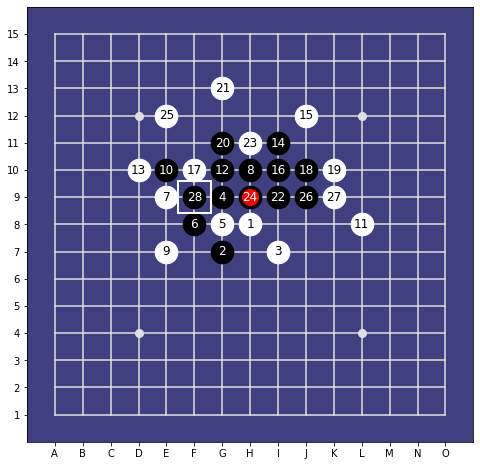

In [7]:
from aegomoku.policies.heuristic_policy import HeuristicPolicy
from aegomoku.utils import analyse_board

heuristic = HeuristicPolicy(BOARD_SIZE, cut_off=.1)
actions = [stone.i for stone in board.stones]
analyse_board(BOARD_SIZE, actions, policy=heuristic)

### Watch the Game Continue

In [8]:
if not game.get_game_ended(board):
    pi = mcts.get_action_prob(board, temperature=.3)
    action = np.random.choice(len(pi), p=pi)
    board.act(action)
else:
    print("Game ended")

board.plot()

Game ended
                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  X  .  .  .  .  .  .  .  .    
12    .  .  .  .  X  .  .  .  .  X  .  .  .  .  .    
11    .  .  .  .  .  .  O  X  O  .  .  .  .  .  .    
10    .  .  .  X  O  X  O  O  O  O  X  .  .  .  .    
 9    .  .  .  .  X [O] O  O  O  O  X  .  .  .  .    
 8    .  .  .  .  .  O  X  X  .  .  .  X  .  .  .    
 7    .  .  .  .  X  .  O  .  X  .  .  .  .  .  .    
 6    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 5    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 4    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 3    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 2    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 1    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O
